# Geografi og distribusjonell semantikk

Lars G Johnsen

Nasjonalbiblioteket
Webinar 01.04.2020

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
mu.update('collocations')
import collocations as coll

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\NER_distributional_semantics\collocations.py`

In [2]:
mu.css()

In [114]:
mu.code_toggle()

In [14]:
from bs4 import BeautifulSoup
from dhlab.nbtokenizer import tokenize

In [6]:
with open("../BS_Nansen_PaaSki_tekst_HTML.html", encoding='utf-8') as f:
    soup = BeautifulSoup(f.read())

In [17]:
text = ''
for p in soup.find_all('div', {'class':'para'}):
    text += p.text

step = 30000
parse = []
for i in range(0, len(text), step):
    if i % 100000 == 0:
        print(i)
    parse += nb.ner(text[i:i+step])

In [25]:
len(parse)

196197

In [29]:
from collections import Counter

In [30]:
counts = Counter([tuple(x) for x in parse if isinstance(x, list)])

In [36]:
import pandas as pd

In [38]:
psg = nb.frame([(r[0], r[1], counts[r]) for r in counts])

In [41]:
psg.columns = ['uttrykk', 'kategori', 'frekv']

In [49]:
newpsg = psg.pivot(columns='kategori', index ='uttrykk', values='frekv').sort_values(by='sted', ascending = False)

In [52]:
nwpsg = psg.pivot(columns='kategori', index ='uttrykk', values='frekv').sort_values(by='person', ascending = False)

In [63]:
tot = nb.frame(nb.totals(50000))

In [66]:
npsg = newpsg.loc[[w for w in newpsg.index if not w.lower() in tot.index]]

# Geografi og distribusjonell semantikk

Lars G Johnsen

Nasjonalbiblioteket
Webinar 01.04.2020

<br>
<br>
<br>
<br>

# Problem

* Ibsen er større enn Shakespeare.
* Molde spilte uavgjort mot Kristiansund
* Malvik bor i Malvik.

<br>
<br>
<br>
<br>
<br>
<br>


## Betydning og klassifikasjon

Andrew Piper

“At base, the distributional hypothesis assumes four things: 
a) a word’s meaning is tied to how often it occurs; 
__b) a word’s meaning is tied to how often it occurs with other words within a given context__ ; 
c) these relationships are entirely contingent upon the scale of analysis; and 
d) these relationships can be rendered spatially to capture the semantic associations between them."

Piper, Andrew. Enumerations (pp. 13-14). University of Chicago Press. Kindle Edition.

<br>
<br>
<br>
<br>



# Geografi

Hvilke ord er geografiske?

"Jeg trodde Malvik bodde i Malvik."

Disambiguering på setningsnivå eller dokumentnivå.

<br>
<br>
<br>
<br>

# Ressurser i Nasjonalbiblioteket 

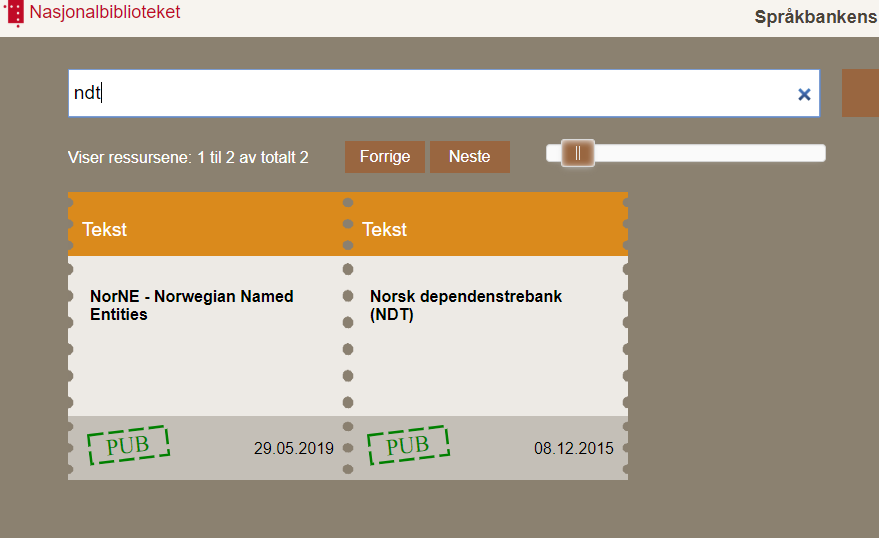


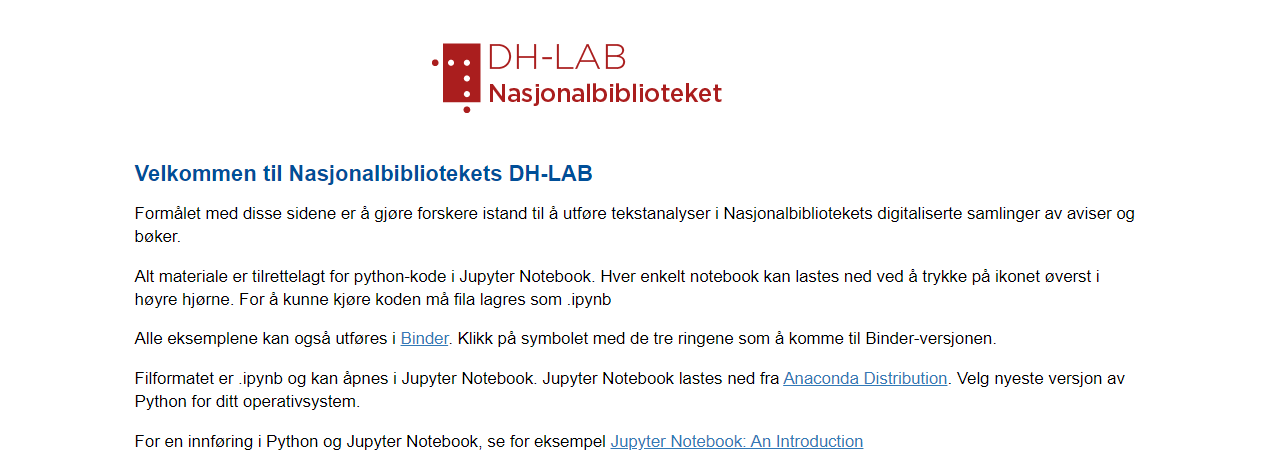


<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>

<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>

# Flere betydnigner

Eksempel Tromsø

In [150]:
P = nb.make_graph('Tromsø')

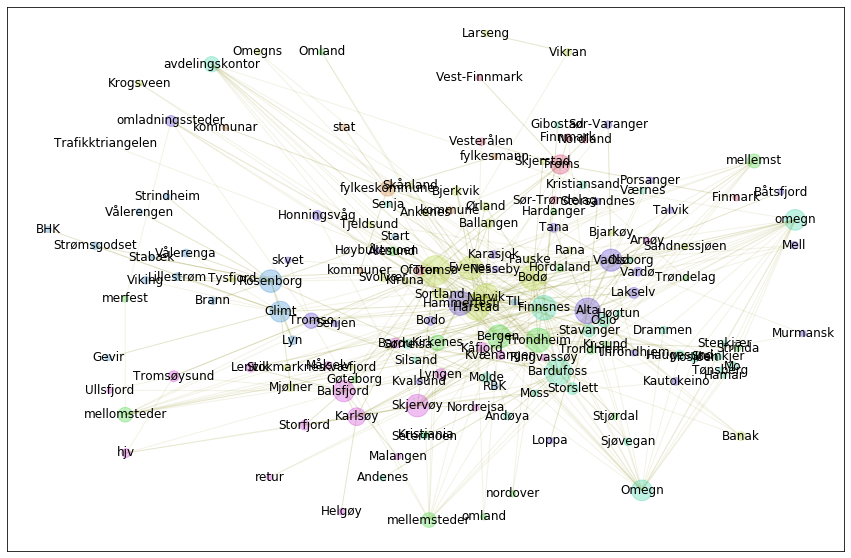

In [153]:
gnl.show_graph(P, spread = 1.2, fontsize=12)

In [152]:
pos=""
comm = gnl.community_dict(P)
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### Tromsø-Narvik
<span style='font-size:1.5em'>Tromsø, Narvik, Harstad, Bodø, Evenes, Sortland, Ørland, Svolvær, Ballangen, Bjerkvik, Banak, Vikran, Mjølner, Fauske, Larseng, Sandnessjøen, Tysfjord, Skjerstad, Stokmarknes, Omegns, Krogsveen, Kiruna, Skånland, Bjarkøy, Tjeldsund, Ankenes, Kvæfjord, Rana, Trafikktriangelen</span>
### Trondheim-Bergen
<span style='font-size:1.5em'>Trondheim, Bergen, Kirkenes, mellomsteder, mellemsteder, mellemst, Ålesund, Trondhjem, Hordaland, Strinda, Stjørdal, nordover, omland, Kr.sund, merfest, Gøteborg, Hardanger, Trøndelag, Omland, Kristiania</span>
### Bardufoss-Finnsnes
<span style='font-size:1.5em'>Bardufoss, Finnsnes, omegn, Omegn, avdelingskontor, Oslo, Stavanger, Storslett, Mosjøen, Molde, Haugesund, Mo, Sørreisa, Drammen, Kristiansand, Sjøvegan, Steinkjer, Andøya, Senja, Stenkjær, Hamar, Tønsberg, Setermoen, Andenes, Moss, Høgtun, Olsborg, Silsand, Værnes, Gibostad</span>
### Rosenborg-Glimt
<span style='font-size:1.5em'>Rosenborg, Glimt, Lyn, Lillestrøm, Brann, Strømsgodset, Viking, Vålerenga, Gevir, Vålerengen, Strindheim, RBK, BHK, Start, Stabæk, TIL</span>
### Alta-Hammerfest
<span style='font-size:1.5em'>Alta, Hammerfest, Vadsø, Tromso, omladningssteder, Lakselv, Honningsvåg, Tana, Vardø, Bodo, Kautokeino, Sør-Varanger, Karasjok, Mell, Throndhjem, Høybuktmoen, Porsanger, Loppa, skyet, Senjen, Storsandnes, Nesseby, Talvik, Kvalsund, Båtsfjord, Murmansk</span>
### Skjervøy-Balsfjord
<span style='font-size:1.5em'>Skjervøy, Balsfjord, Karlsøy, Lyngen, Tromsøysund, Kåfjord, Bardu, Storfjord, Lenvik, Kvænangen, hjv, Målselv, Helgøy, Ringvassøy, Arnøy, Malangen, Nordreisa, Ullsfjord, retur</span>
### Troms-Ofoten
<span style='font-size:1.5em'>Troms, Ofoten, Vesterålen, Sør-Trøndelag, Finnmark, Vest-Finnmark, Finmark, Nordland</span>
### fylkeskommune-kommune
<span style='font-size:1.5em'>fylkeskommune, kommune, fylkesmann, stat, kommuner, kommunar</span>


<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>

# Fra dhlab-modul

ner("Jeg trodde Malvik bodde i Malvik.")

In [116]:
nb.ner("Jeg trodde Malvik bodde i Malvik.")

['Jeg', 'trodde', ['Malvik', 'person'], 'bodde', 'i', ['Malvik', 'sted'], '.']

<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>

<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>

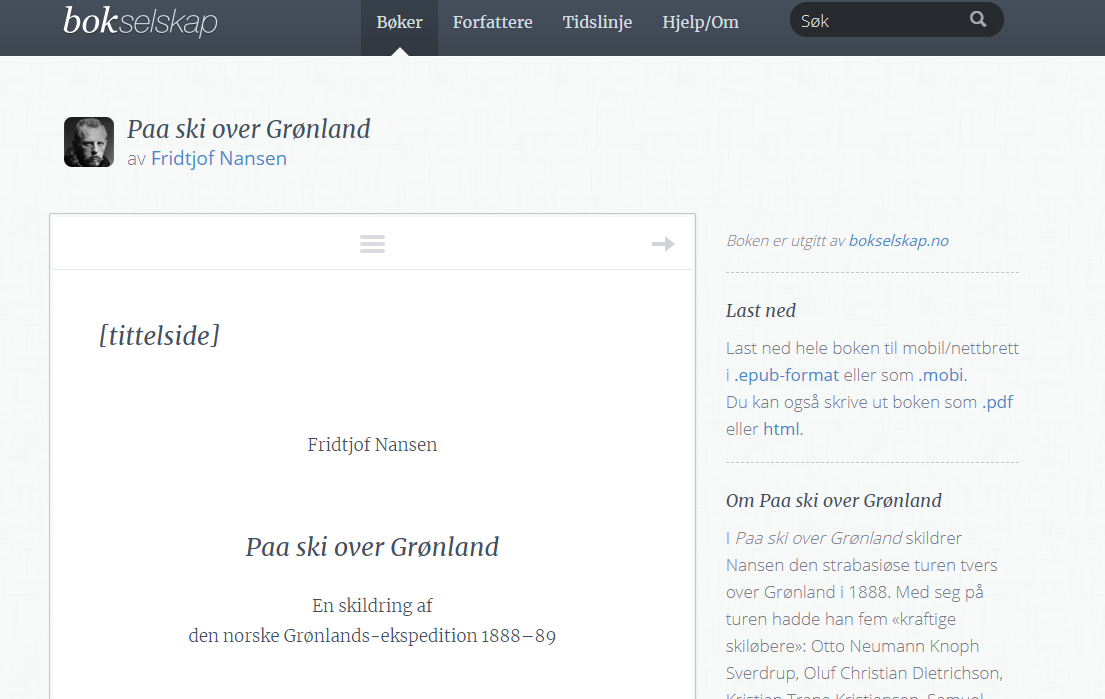

<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>

<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>

# Liste over foreslåtte personer

In [72]:
nb.frame_sort(npsg, 'person').head(50).fillna(0).style.background_gradient(axis=1)

kategori,person,sted
uttrykk,,
Balto,73,23
Sverdrup,63,17
Grønlands,41,29
Dietrichson,38,16
Ravna,37,11
Jason,32,1
Grønland,30,68
Kristiansen,27,5
Nansen,23,9


<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>

# Foreslåtte steder

In [74]:
nb.frame_sort(npsg, 'sted').head(30).fillna(0).style.background_gradient(axis=1)

kategori,person,sted
uttrykk,,
Grønland,30,68
Godthaab,7,51
Norge,3,49
Grønlands,41,29
Kristiania,1,26
Europa,0,24
Balto,73,23
Kap Dan,4,17
Sverdrup,63,17


In [76]:
ratiodf = npsg.fillna(1)

In [77]:
ratiodf['ratio'] = ratiodf['person']/ratiodf['sted']

In [117]:
#nb.frame_sort(ratiodf, 'ratio').head(20).style.background_gradient(axis=1)